<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/p3/m2p_B01_B_ImageSplines_Version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M2P: B-Spline Signal Processing Part I Theory**

Micheal Unser, IEEE Tranaction on Signal Processing, Vol 41. No 2. 1993. [Download the original paper.](https://ieeexplore.ieee.org/document/193220)
  
 <br/> 
This tutorial is prepared by: [Amey Joshi]() and [Ibraheem Al-Dhamari]()

----

In [0]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>


<!-- TODO: add links -->
<!--
* Curve representation: Bezier and B-Spline curves. 
   - Seprate file with interactive tools e.g. https://gist.githubusercontent.com/Juanlu001/7284462/raw/11d51c255e9c1e0db1f4e0ccf3905abd6115d748/bezier_curves.py

* Image representation
  - SimpleITK: https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/tree/master/Python
  - Spatial domain   
  - Frequency domain e.g. Fourier transform
* Function interploation:
  - polynomial
  - B-spline, types of B-spline
  - Image interploation e.g. resize an image, get missing region
 
* nD signal to Bspline: examples 1D,2D image, 3D image 
* Bspline to nD signal: examples 1D,2D image, 3D image 
* 2D,3D, image derivative using B-spline
  - Image deruvatives introduction, image curvature
* Image smoothing  
* Evaluation: B-spline vs stanadrd representation -->

# Introduction
The goal of this paper is to develop a theory of constructing an image function that best represents the discrete data of a digital image. 
2D Images can be represented by 2D matrices e.g. binary or gray scale images. or 3D matrices where the z coordinates represents the color channels e.g. in RGB z = 3. 

$ I_{x,y} = f(x,y) = v$ for binary, gray scale, or coloe image

$ I_{x,y,color} = f(x,y,color) = v$ for color images
Where v is the color or the intensity value. $f(20,30,1) =255$ means at the image location (height 20, width 30) in the red color chanel, the intensity value is 255. If we have:

- $f(20,30,1) =255$
- $f(20,30,2) =0$
- $f(20,30,3) =0$

this produces a red color at that image location $x=20,y=30$, notice here that the x represent the vertical line or the height while y represent the width or the horizental line. This is sometime confusion as it is like inverse of the standard Euclidean coordinates.  


A good introduction to digital images can be found in the [tutorialspoint course](https://www.tutorialspoint.com/dip/image_processing_introduction.htm)


For a binary image these are two numbers e.g. 0 or 1 if the data type of the image is 1 bit, or 0 or 255 if the data types of the image is 8 bits. 

$\color{blue}{\text{Example:}}$ if we have color image of height 200 pixels and width 150 pixels, it can be represented by a 3D matrix of a size 200x150x3.


For sake of simplicity, let us consider grey scale images. In this case, an image function maps every point in the xy plane to the image intensity at that point. In mathematical terms, an image function $g$ maps $\mathbb{R}^{2}$ to $\mathbb{R}$. This problem is the inverse of the sampling problem. In a sampling problem, we select a countable number of values of the continuous signal to create a discrete-time (or a discrete-space) signal. In this case, we are guessing an image function that could have generated the sample we have in the form of a digital image. Like many other examples of problems, the inverse problem is much harder than the forward problem.



In [0]:
#TODO by Ibraheem
# demo of images and their sizes, intensity values, and data-types

# binary image
# color image


# Preliminaries


## Representation of 1-d signals
Before we consider the problem of infering an image function that could have generated a given digital image, let us consider the the problem of finding a function of one variable that could have generated a given discrete time/space signal. Suppose that we are given a discrete signal as a sequense $S_{1}$:

$S_{1} = y_1, \ldots, y_n$ 
 
 sampled at points represented by $S_{2}$
 
$S_{2} = x_1, \ldots, x_n$
 
 Then we want to find a function 
 
 $f:\mathbb{R} \mapsto \mathbb{R}$ 
 
 such that:
 
  $f(x_i) = y_i$ for all $i = 1, \ldots, n$. 
  
<!-- please add example -->
It is clear that there are an infinitely many functions that satisfy this requirement. For if we find one of them then we can find another one that differs from the original one by taking a value different at just one point other than  $x_1, \ldots, x_n$ Let us consider an example. We are given the points $(1,2), (2, 4), (3, 6)$ and $(4, 8)$. A straight line $y = 2x$ passes through all of them. However, there are other functions as well. For example:

- $y = 2x + \sin((x - [x])\pi)$, where $[x]$ is the greatest integer not greater than $x$.
- $y = 2x + \ln(1 + x - [x])$.

 We show them in the code snippet below.



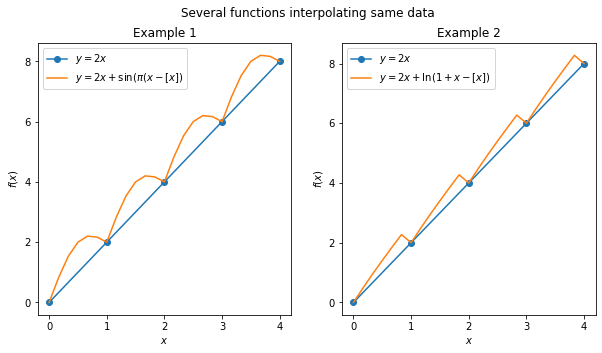

In [0]:
# Example of interpolation.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 5)
y = 2*x 

x1 = np.linspace(0, 4, 25)
y1 = 2*x1 + np.sin(np.pi * (x1 - np.floor(x1)))
y2 = 2*x1 + np.log(1 + x1 - np.floor(x1))

fig = plt.figure(figsize = (10, 5))
fig.suptitle('Several functions interpolating same data')

p1 = plt.subplot(121)
p1.set_title('Example 1')
plt.plot(x, y, marker = 'o', label = r'$y = 2x$')
plt.plot(x1, y1, label = r'$y = 2x + \sin(\pi(x - [x])$') 
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

p2 = plt.subplot(122)
p2.set_title('Example 2')
plt.plot(x, y, marker = 'o', label = r'$y = 2x$')
plt.plot(x1, y2, label = r'$y = 2x + \ln(1 + x - [x])$') 
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

plt.show()


Which one among these infinitely many candidate functions should we select as the best choice that could have generated our discrete signal?

Normally, we choose a function that is as $\color{blue}{\text{smooth}}$  as possible. The word $\color{blue}{\text{smooth}}$ means the same in mathematics as it does in plain English. It means that the function is continuous and that its graph does not have wild fluctuations or sharp edges. The code snippet below shows an example of a smooth and a non-smooth function.  

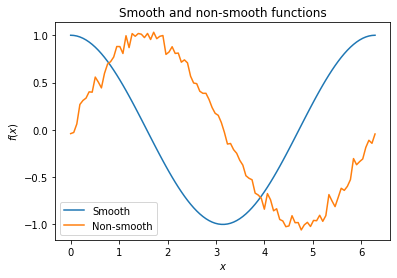

In [0]:
# Smooth and non-smooth functions.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x) + np.random.normal(0, 1, 100) * 0.05

plt.plot(x, y1, label = 'Smooth') 
plt.plot(x, y2, label = 'Non-smooth')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Smooth and non-smooth functions')
plt.legend()
plt.show()


In mathematical terms, this function must belong to a class $C^n$ for some positive integer $n$. The class $C^n$ has functions whose first $n$ derivatives are continuous. Recall that a function is differentiable only if it is continuous. Therefore, if the $n$-th derivative of a function exists then $f, f^\prime, f^{\prime\prime}, \ldots, f^{(n-1)}$ are all continuous. The $n$-th derivative $f^{(n)}$ exists. But it may or may not be continuous. 

$\color{green}{\text{Why do we need the derivatives to be continuous?}}$ We illustrate the need with a simple example of functions over $[-1, 1]$. 

On the left hand side we plot the function 

$f_{1} = |x|$, 

which is continuous. However, its derivative is $-1$ for $x < 0$ and $+1$ for $x > 0$. It does not have a derivative at $x = 0$. Thus, the derivative of $f_{1} = |x|$ is not a continuous function of $x$. 

On the right hand side we plot the function 

$f_{2} = x^2$.

 It is continuous and has continuous derivative
 
 $f^\prime_{2} = 2x$.


<!--
Notes:
- missing numerical examples
 - add two figures smooth function with its derivative vs non-smooth function wit its derivative
 - the polynomial example is excellent but we should explain how it works in sparate file. 
 - Bspline as a tool for curve representation (separate file) 
 - function interploation (separate file? 
 -  add references for the informatin 
 - No need to use numbering. Probably use the one from the paper.
  -->  

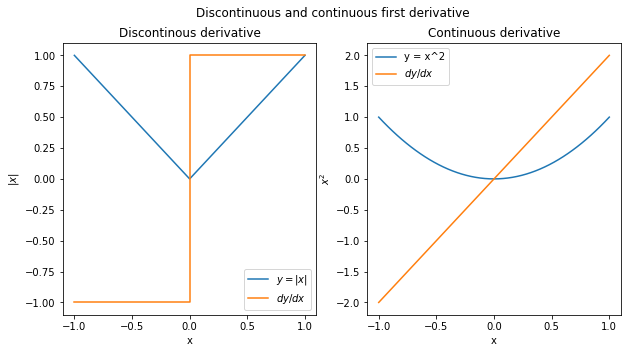

Fig.1 Example of smooth and not-smooth function
      Left f_1=|x|, right: f_2=x^2


In [0]:
# Examples of functions with continuous and discontinuous derivatives.

import numpy as np
import matplotlib.pyplot as plt

# We generate 51 linearly space points x_1, ..., x_n between -1 and 1.
x = np.linspace(-1, 1, 51)
# A function in class C^1.
y_c1 = abs(x)
# A function in class C^2
y_c2 = x*x

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Discontinuous and continuous first derivative')
p1 = plt.subplot(121)
p1.set_title('Discontinous derivative')
plt.plot(x, y_c1, label = r'$y = |x|$')
plt.plot([-1, 0, 0, 1], [-1, -1, 1, 1], label = r'$dy/dx$')
plt.xlabel('x')
plt.ylabel(r'$|x|$')
plt.legend()

p2 = plt.subplot(122)
p2.set_title('Continuous derivative')
plt.plot(x, y_c2, label = r'y = x^2')
plt.plot(x, 2*x, label = r'$dy/dx$')
plt.xlabel('x')
plt.ylabel(r'$x^2$')
plt.legend()

plt.show()
print('Fig.1 Example of smooth and not-smooth function')
print('      Left f_1=|x|, right: f_2=x^2')



## Continuous polynomials and splines - I

Even if we restrict our attention to smooth functions, we soon realize that there are an infinite number of smooth functions satisfying the condition that:

 $f(x_i) = y_i$ for all $i = 1, \ldots, n$
 
 Once again, we will make our point using an example. We consider $101$ samples of the function:
 
  $y = f(x) = 1/(1 + 25x^2)$
  
   We will try to fit a number of polynomials to these 101 points. Althought a polynomial of degree $n$ belongs to the class $C^n$, none of them approximate the function $f$ well.   $\color{green}{\text{This is where splines come into the picture.}}$


The word $\color{blue}{\text{spline}}$ means a long, thin, flexible strip of wood or a metal. It was used in the pre-computer days to draw smooth curves passing through fixed points. The points were marked with heavy nails and the spline was made to go around each on of them, [see this visual explaination](https://www.youtube.com/watch?v=x_3npgtc1iI). It described a smooth curve that passed through all points. The Romanian-American mathematician I. J. Schoenberg used this idea to generate smooth functions passing through given points and decided to call them spline functions. Splines are polynomials between two consecutive 'nails' but the polynomial between two consecutive nails is different from the one between the prior and the succeeding nails. That is why splines are said to be $\color{blue}{\text{piece-wise polynomial}}$.

Figure 2 shows the outcome of trying to fit polynomials of varying orders compared with $\color{blue}{\text{spline interpolation}}$. We try fitting polynomials of degrees $3, 5$ and $7$ to the points marked as red dots. We observe that the higher order polynomials fit the points better but they also oscillate in a way the original function did not. This behaviour is called  $\color{blue}{\text{Runge's phenomenon}}$, in honour of the German mathematician Carl David Tolmé Runge who first reported it. We will describe later how to implement the functions $\color{red}{\text{interpolate.splrep}}$ and $\color{red}{\text{interpolate.splev}}$ as part of this tutorial.


ERROR! Session/line number was not unique in database. History logging moved to new session 60


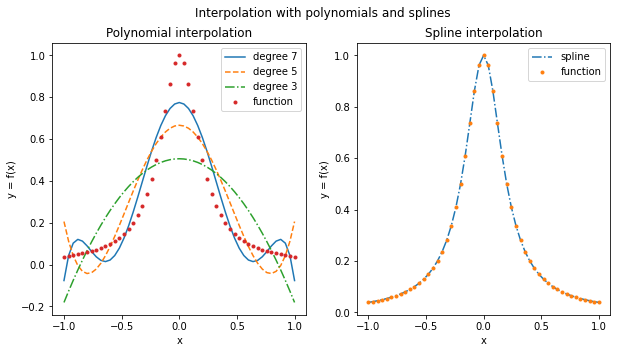

Fig.2 The function f(x)=1/(1 + 25 x^2) interpolation with smooth functions.
Left: polynomials of degrees 3,5, and 7. Right Cubic B-Spline


In [0]:
# Polynomial versus spline interpolation.

from scipy import interpolate

# We generate a 'sample' of this function.
def f(x):
   return 1/(1 + 25*pow(x, 2))

x = np.linspace(-1, 1, 101)

# We try to fit polynomials of degrees 3, 5 and 7.
p3 = np.poly1d(np.polyfit(x, f(x), 3))
p5 = np.poly1d(np.polyfit(x, f(x), 5))
p7 = np.poly1d(np.polyfit(x, f(x), 7))

# We try fitting a spline.
# We start with building a spline representation of the data.
tck = interpolate.splrep(x, f(x))
# We then evalate the splines at certain points. Here we choose
# half the number of points we had in the original sample.
xp = np.linspace(-1, 1, 51)
y_sp = interpolate.splev(xp, tck)

fig = plt.figure(figsize = (10, 5))
fig.suptitle('Interpolation with polynomials and splines')
p1 = plt.subplot(121)
p1.set_title('Polynomial interpolation')
plt.plot(xp, p7(xp), '-', label = 'degree 7')
plt.plot(xp, p5(xp), '--', label = 'degree 5')
plt.plot(xp, p3(xp), '-.', label = 'degree 3')
plt.plot(xp, f(xp), '.', label = 'function')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()

p2 = plt.subplot(122)
p2.set_title('Spline interpolation')
plt.plot(xp, y_sp, '-.', label = 'spline')
plt.plot(xp, f(xp), '.', label = 'function')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()
print("Fig.2 The function f(x)=1/(1 + 25 x^2) interpolation with smooth functions.")
print("Left: polynomials of degrees 3,5, and 7. Right Cubic B-Spline")

## Some topics in signal processing

$\color{red}{\text{this section is a lot of important equations without examples or code to show the implementation e.g. Z, Laplace, Fouriour  transfrom, convolution}}$

The $\color{blue}{\text{Z-transform}}$ of a signal $x[n]$ is defined as:
$$\tag{1}
X(z) = \sum_{n=-\infty}^\infty x[n]z^{-n},
$$ 
where $z$ is a complex variable. 
The $z$-transform is a discrete analog of the $\color{blue}{\text{Laplace transform}}$ of continuous functions. Let us consider a few examples of $z$-transform.

- Let $x[n] = \delta[n]$, a signal that is zero for all $n$ except $n = 0$, where it is $1$. Its $z$-transform is
$$
X(z) = \sum_{k=-\infty}^\infty \delta[k]z^{-k} = z.
$$
The function $X(z)$ is defined and is continuous for all $z \in \mathbb{C}$.

- Let $u[n]$ be the unit step. That is $u[n] = 1$ for all $n \ge 0$ and $u[n] = 0$ for all $n < 0$. Then its z-transform is
$$
U(z) = \sum_{k=-\infty}^\infty u[n]z^{-n} = \sum_{k=0}^\infty z^{-n} = 1 + z^{-1} + z^{-2} + \cdots.
$$
If $|z| > 1$ then the abose series converges and we have
$$
U(z) = \frac{1}{1 - z^{-1}}.
$$
Unlike the previous example where $X(z)$ was defined all over the complex plane, $U(z)$ is restricted to the region $|z| > 1$. It is *not defined* on and inside the unit circle.

- Consider the exponential signal
$$
x[n] = -a^nu[-n-1],
$$
where $u$ is the unit step defined in the previous example. $u[-n-1] = 1$ if $-n-1 \ge 0$ that is $n \le -1$. It is zero otherwise. Thus,
$$
x[n] = \begin{cases}
-a^n & n \le -1 \\
0 & n > -1
\end{cases}
$$
Its $z$-transform is
$$
X(z) = \sum_{k=-\infty}^\infty x[k]z^{-k} = -\sum_{k=-\infty}^{-1}a^k z^{-k}.
$$
Now make the substitution $k \mapsto -k$ so that
$$
X(z) = -\sum_{k=1}^\infty a^{-k}z^k = 1 - \sum_{k=0}^\infty a^{-k}z^k.
$$
If $|a^{-1}z| < 1$ that is if $|z| < |a|$, the above series converges to
$$
X(z) = 1 - \frac{1}{1 - a^{-1}z} = \frac{z}{z - a},
$$
which is the $z$ transform of the exponential signal. 

The $z$-transform is a complex function of a complex variable. Therefore, when we plot it, we have to plot its real and imaginary parts separately. In the code snippet below, we will plot the $z$-transform of $u[n]$, that is
$$
U(z) = \frac{1}{1 - z^{-1}}.
$$
Its real and imaginary parts are
$$
\begin{eqnarray*}
\Re(U)(x, y) &=& \frac{x(x-1) + y^2}{(x - 1)^2 - y^2} \\
\Im(U)(x, y) &=& -\frac{y}{(x - 1)^2 - y^2}
\end{eqnarray*}
$$





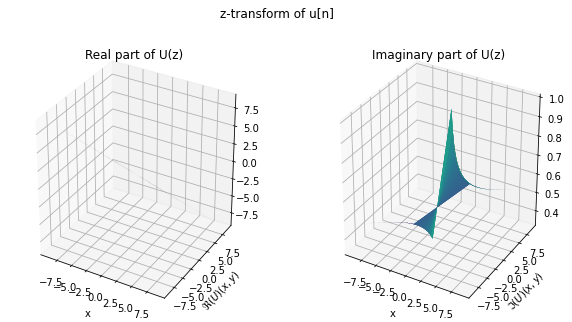

In [0]:
# Example of plotting a z-transform

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

# We will plot the function U(z) on the grid ([-3, -1] U [1, 3]) x ([-3, -1] U [1, 3]) 
R = np.concatenate((np.linspace(-3, -1, 15), np.linspace(1, 3, 15)))
x = np.outer(R, R)
y = np.outer(R, R)

# The denominator is common. We evaluate it once.
D = np.multiply(x - 1, x - 1) - np.multiply(y, y)
z_re = np.divide(np.multiply(x, x-1) + np.multiply(y, y), D)
z_im = -np.divide(y, D)

fig = plt.figure(figsize = (10, 5))
fig.suptitle('z-transform of u[n]')

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(x, y, z_re, cmap = 'viridis', edgecolor = 'none')
ax1.set_title('Real part of U(z)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_ylabel(r'$\Re(U)(x, y)$')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(x, y, z_im, cmap = 'viridis', edgecolor = 'none')
ax2.set_title('Imaginary part of U(z)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_ylabel(r'$\Im(U)(x, y)$')

plt.show()



 It exists at all points in the complex plane where the series on the right hand side is absolutely convergent. That is, all points $z \in \mathbb{C}$ where
$$\tag{2}
\sum_{n=-\infty}^\infty \Big|x[n]z^{-n}\Big|
$$ exits. The region of the complex plane where $X(z)$ exists is called the region of convergence $ROC$ of the $z$-transform.

The $\color{blue}{\text{convolution}}$ of signals $x[n]$ and $y[n]$ is defined as 
$$\tag{3}
u[n] = (x \star y)[n] = \sum_{m=-\infty}^\infty x[m]y[n-m].
$$



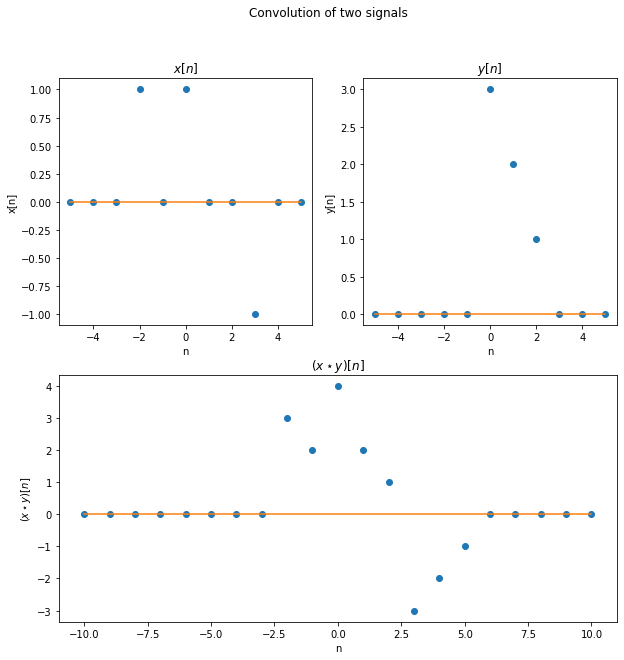

In [0]:
# Convolution example 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec

x = [0, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0 ]
y = [0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0]
z = np.convolve(x, y)
n = np.linspace(-5, 5, 11)
n1 = np.linspace(-10, 10, 21)

gs = gspec.GridSpec(2, 2)
fig = plt.figure(figsize = (10, 10))
fig.suptitle('Convolution of two signals')
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(n, x, 'o', label = r'$x[n]$')
ax1.plot([-5, 5], [0, 0])
ax1.set_xlabel('n')
ax1.set_ylabel('x[n]')
ax1.set_title(r'$x[n]$')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(n, y, 'o', label = r'$y[n]$')
ax2.plot([-5, 5], [0, 0])
ax2.set_xlabel('n')
ax2.set_ylabel('y[n]')
ax2.set_title(r'$y[n]$')

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(n1, z, 'o', label = r'$(x \star y)[n]$')
ax3.plot([-10, 10], [0, 0])
ax3.set_xlabel('n')
ax3.set_ylabel(r'$(x \star y)[n]$')
ax3.set_title(r'$(x \star y)[n]$')

plt.show()



It can be shown that the $z$-transform of a convolution of two signals is a product of the $z$-transforms of the signals. This is analogous to the property of discrete Fourier transform (which is a special case of $z$-transform), the continuous Fourier transform and the continuous Laplace transform. In mathematical terms:

 $U(z) = X(z)Y(z)$

 We can unravel the original signal $x[n]$ in a convolution by taking the inverse $z$-transform of $U(z)/Y(z)$ at all points where $Y$ does not vanish, that is become $0$. 

We will demonstrate this fact using the example of signals used to plot the figures above. We can read off the $z$ transform from the three plots.
$$
\begin{eqnarray*}
X(z) &=& z^2 + 1 - z^{-3} \\
Y(z) &=& 3 + 2z^{-1} + z^{-2} \\
U(z) &=& 3z^2 + 2z + 4 + 2z^{-1} + z^{-2} - 3z^{-3} - 2z^{-4} - z^{-5}
\end{eqnarray*}
$$
We can readily verify that $U(z) = X(z)Y(z)$.




The adjoint of a signal is defined as $x^\ast[n] = \overline{x[-n]}$. This is analogous to the definition of the hermitian adjoint of a matrix. It is just the complex conjugate of the transpose. The $z$-transform of the adjoint signal is 
$$\tag{4}
X^\ast(z) = \sum_{k=-\infty}^\infty x^\ast[k]z^{-k} = \sum_{k=-\infty}^\infty \overline{x[-k]\bar{z}^{-k}} = \sum_{k=-\infty}^\infty \overline{x[k]\bar{z}^{k}} = \sum_{k=-\infty}^\infty \overline{x[k]\left(\frac{1}{\bar{z}}\right)^{-k}} = \overline{X\left(\frac{1}{\bar{z}}\right)}.
$$
In the case of a real-valued signal $x^\ast[n] = x[-n]$ and
$$\tag{5}
X^\ast(z) = \sum_{k=-\infty}^\infty x^\ast[k]z^{-k} = \sum_{k=-\infty}^\infty x[-k]z^{-k} = \sum_{k=-\infty}^\infty x[k]z^{k} = \sum_{k=-\infty}^\infty x[k]\left(\frac{1}{z}\right)^{-k} = X\left(\frac{1}{z}\right).
$$

Up-sampling a signal means increasing the number of sample points by a certain factor. We can up-sample a signal by a factor $m$ by inserting $m - 1$ zeros between successive values of the signal. Mathematically, an upsampled signal is defined as
$$\tag{6}
x_{\uparrow m}[n] = \begin{cases}
x[l] & \text{ if } n = ml \\
0    & \text{ otherwise.}
\end{cases}
$$
We can easily get an expression for the $z$-transform of an up-sampled signal.
$$\tag{7}
X_{\uparrow m}(z) = \sum_{k=-\infty}^\infty x_{\uparrow m}[n]z^{-n} = \sum_{k=-\infty}^\infty x[n]z^{-mn} = X(z^m).
$$

We can down-sample a signal by a factor of $m$ by selecting every $m$th of its sample. Mathematically a down-samples signal is defined as
$$\tag{8}
x_{\downarrow m}[n] = x[nm].
$$
Let us now get an expression for $z$-transform of the downsampled signal.
$$\tag{9}
X_{\downarrow m}(z) = \sum_{k=-\infty}^\infty x_{\downarrow m}[k]z^{-k} = \sum_{mk=-\infty}^\infty x[mk]z^{-k} = \sum_{k \in m\mathbb{Z}} x[k]z^{-mk}.
$$
The set $m\mathbb{Z}$ is the set of all multiples of $m$, that is $\{\ldots, -2m -m, 0, m, 2m, \ldots\}$. Evaluating this sum involves a bit of care for the sum is not over $\mathbb{Z}$ but $m\mathbb{Z}$. To proceed, we use the fact
$$\tag{10}
\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
m & \text{ for } n \in m\mathbb{Z} \\
0 & \text{ otherwise.}
\end{cases}
$$
It allows us to define the pulse sequence
$$\tag{11}
p_m[n] = \frac{1}{m}\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
1 & \text{ if } n \in \mathbb{Z} \\
0 & \text{ otherwise.}
\end{cases}
$$
We can then write
$$\tag{12}
X_{\downarrow m}(z) = \sum_{k \in \mathbb{Z}} p_m[k]x[k]z^{-k},
$$ where the summation extends over all integers. After substituting the expression for $p_m[k]$ we readily get
$$\tag{13}
X_{\downarrow m}(z) = \frac{1}{m}\sum_{j=0}^{m-1}X\left(e^{-2\pi ij/m}z^{1/m}\right).
$$



## Continuous Polynomial Splines and B-Spline - II
We introduced spline as a thin, flexible strip of wood or metal that was madeto go round heavy nails to fit a smooth curve that passed through the points represented by nails. We will now give a rigorous mathematical definition. A spline is a function $S:[a, b] \mapsto \mathbb{R}$ where the interval is punctuated by points $t_1, \ldots, t_{n-1}$ called *knots*. The knots are a mathematical representation of the nails. It is convenient to let $t_0 = a$ and $t_n = b$. In each interval $[t_i, t_{i+1}]$, where $i = 0, \ldots, n-1$, $S$ is polynomial, say $P_i$. The polynomials across the intervals are not chosen arbitrarily. Rather, that are required to have identical values with the neighboring polynomials at the boundary points. That is, $P_i(t_{i+1}) = P_{i+1}(t_{i+1})$. Not only do the values of the polynomials match but we also that the values of their derivatives match. These stringent matching conditions give splines the smoothness they acquire.

The set of all splines where the knots are a distance $1$ apart and where the polynomials $P_i$ in the interval $[t_i, t_{i+1}]$ are of degree $n$ is denoted by $S_1^n$. It is an infinite dimensional Hilbert space. B-splines are a basis of $S^1_n$. Since an element of $S_1^n$ is a polynomial of degree $n$ between consecutive knots, it is $n$ times differentiable between consecutive knots. Not only that, the $n$ derivatives are continuous between consecutive knots. As a result, elements of $S_1^n$ belong to the class $C^{n}$. (Recall that $C^n$ is a class (set) of functions whose first $n$ derivatives are continuous.)

The basis functions of $S_1^n$, called B-splines are defined as
$$\tag{1}
\beta^n(x) = \sum_{j=0}^{n+1}\frac{(-1)^j}{n!}\binom{n+1}{j}\left(x + \frac{n+1}{2} - j\right)^n\mu\left(x + \frac{n+1}{2} - j\right),
$$
where $$\tag{2}
\mu(x) = \begin{cases}
1 & \text{ if } x \ge 0 \\
0 & \text{ otherwise}
\end{cases}
$$ is the step function. Thus, the B-spline $\beta^3(x)$ is
$$\tag{3}
\beta^3(x) = \frac{1}{6}(x+2)^3\mu(x+2) -\frac{2}{3}(x+1)^3\mu(x+1) + x^3\mu(x) - \frac{2}{3}(x-1)^3\mu(x-1) + \frac{1}{6}(x-2)^3\mu(x-2).
$$
Before proceeding we will plot a few splines.


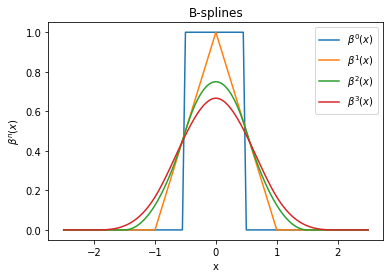

Fig.3 A few B-splines


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def mu(x):
  y = np.ones(len(x))
  # Select indices of x where x[i] < 0.
  si = np.where(x < 0)[0]
  y[si] = 0
  return y

lo = -2.5
hi = 2.5
n_samples = 101

x = np.linspace(lo, hi, n_samples)

# Compute the two terms of \beta^0(x)
b_0 = mu(x + 1/2)
b_1 = mu(x - 1/2)

beta_0 = b_0 - b_1

# Computer the three terms of \beta^1(x)
b_0 = np.multiply((x+1), mu(x+1))
b_1 = np.multiply(x, mu(x))
b_2 = np.multiply((x-1), mu(x-1))

beta_1 = b_0 - 2*b_1 + b_2

# Compute the four terms of \beta^2(x)
b_0 = np.multiply(pow(x + 3/2, 2), mu(x + 3/2))/2
b_1 = -3 * np.multiply(pow(x + 1/2, 2), mu(x + 1/2))/2
b_2 = 3 * np.multiply(pow(x - 1/2, 2), mu(x - 1/2))/2
b_3 = -np.multiply(pow(x - 3/2, 2), mu(x - 3/2))/2

beta_2 = b_0 + b_1 + b_2 + b_3

# We will call the five terms of \beta^3(x) b_0, b_1, b_2, b_3.
b_0 = np.multiply(pow(x + 2, 3), mu(x + 2))/6
b_1 = -2/3 * np.multiply(pow(x + 1, 3), mu(x + 1))
b_2 = np.multiply(pow(x, 3), mu(x))
b_3 = -2/3 * np.multiply(pow(x - 1, 3), mu(x - 1))
b_4 = np.multiply(pow(x - 2, 3), mu(x - 2))/6

beta_3 = b_0 + b_1 + b_2 + b_3 + b_4

p = plt.plot(x, beta_0, label = r'$\beta^0(x)$')
p = plt.plot(x, beta_1, label = r'$\beta^1(x)$')
p = plt.plot(x, beta_2, label = r'$\beta^2(x)$')
p = plt.plot(x, beta_3, label = r'$\beta^3(x)$')
p = plt.xlabel('x')
p = plt.ylabel(r'$\beta^n(x)$')
plt.title('B-splines')
plt.legend()
plt.show()
print('Fig.3 A few B-splines')


We mentioned that B-splines are a basis of $S_1^n$. Therefore, any element of $S_1^n$ can be expressed as a linear combination of the B-splines. If $g^n(x) \in S_1^n$ then
$$\tag{4}
g^n(x) = \sum_{k=-\infty}^\infty y_k \beta^n(x - k).
$$
The coefficients $y_k$ form a sequence of real numbers. Note that the basis set of $S_1^n$ is $\mathcal{B} = \{\beta^n(x - k) : k \in \mathbb{Z}\}$. It is an infinite set making $S_1^n$ an infinite dimensional space.

B-splines and their derivatives satisfy the following recurrence relations.
$$\tag{5}
n\beta^n(x) = \left(\frac{n+1}{2} + x\right)\beta^{n-1}\left(x + \frac{1}{2}\right) +  \left(\frac{n+1}{2} - x\right)\beta^{n-1}\left(x - \frac{1}{2}\right)
$$
and
$$\tag{6}
\frac{d\beta^n(x)}{dx} = \beta^{n-1}\left(x + \frac{1}{2}\right) - \beta^{n-1}\left(x - \frac{1}{2}\right).
$$
One can also construct B-splines using the convolution property.
$$\tag{7}
\beta^n(x) = (\beta^{n-1} \star \beta^0)(x).
$$
A proof these relations is quite involved. Therefore, we merely state them.



In [0]:
import numpy as np
import matplotlib.pyplot as plt

# We want to consider signals for n = -5, -4, ..., 4, 5.
# Note that we want to simulate negative indexes. We do
# so by translating an index to its array position. An
# index i of the signal translates to (i + EXTENT) in the
# array. Thus, the signal indexes -5, -4, ..., 4, 5 map to
# array indexes 0, 1, ..., 10.
EXTENT = 5

# The vectors b_1^0 and c_1^0.
b = np.zeros(2 * EXTENT + 1)
c = np.zeros(2 * EXTENT + 1)

# Initial values
b[0 + EXTENT] = 1
c[0 + EXTENT] = 1

def get_b1(k):
    i = k + 5 # index in the array
    return (k + 1) * c[i] + (1 - k) * c[i - 1]

def get_c1(k):
    i = k + 5
    return (k + 3/2) * b[i + 1] + (1/2 - k)*b[i]

# The vectors b_1^1 and c_1^1.
B = np.zeros(2 * EXTENT + 1)
C = np.zeros(2 * EXTENT + 1)
for k in range(-3, 3):
    B[k + EXTENT] = get_b1(k)
    C[k + EXTENT] = get_c1(k)

print(B)
print(C)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]


We notice that $b[0] = 1$ and $c[0] = c[1] = 1/2$. Rest all are zero. These values match with the coefficients of the powers of $z$ in the $z$ transform expressions of table I of the paper. Refer to the row $n = 1$.

### Transform domain characteristics

Let us now consider the $z$-transform of the signal $b_m^0[k]$ where $m$ is odd. It is
$$\tag{1}
B_m^0(z) = \sum_{k=-\infty}^\infty b_m^0[k]z^{-k}.
$$
Since $b_m^0[k] = 1$ only for $-m/2 \le k \le m/2$. Since $m$ is odd, the greatest integer lesser than $m/2$ is $(m-1)/2$. Likewise, the smallest integer larger than $-m/2$ is $\left\lceil{-m/2}\right\rceil$. Therefore,
$$\tag{2}
B_m^0(z) = \sum_{k=[-m/2]}^{(m-1)/2}z^{-k}.
$$
This is just a geometric series which can be easily summed.
$$\tag{3}
B_m^0(z) = z^{\left\lceil{m/2}\right\rceil}\frac{1 - z^{-m}}{1 - z^{-1}} = z^{[m/2]}\frac{1 - z^{-m}}{1 - z^{-1}},
$$. The second expression is identical to the first except that we use the notation $[\cdot]$ for greatest integer not greater than the argument function. This latter notation is the one used in the paper and we will use it going forward. From the form of $\beta^n(x)$ it is clear that the function is non-zero in the range $(-(n+1)/2, (n+1)/2)$. Therefore, the range of $k$ for which $b^n_1[k]$ is non-zero is between $[-n/2]$ to $[n/2]$. Therefore,
$$\tag{4}
B_1^n(z) = \sum_{k=-[n/2]}^{[n/2]} b_1^n[k]z^{-k}.
$$
Using the convolution expressions for $b_m^n$ we can readily conclude that 
$$\tag{5}
\begin{eqnarray}
B_m^n(z) &=& \frac{1}{m^n}\left(B_m^0(z)\right)^{n+1}B_1^n(z) \\
&=& \frac{z^{[m/2](n+1)}}{m^n}\left(\frac{1 - z^{-m}}{1 - z^{-1}}\right)^{n+1}\sum_{k=-[n/2]}^{[n/2]} b_1^n[k]z^{-k}.
\end{eqnarray}
$$
The expression $[m/2](n+1)$ is equal to $(m-1)(n+1)/2$ when $m$ is odd and $n$ is even but it is not so when $m$ is even and $n$ is odd. In order to get the Fourier transform of $b_m^n[k]$ we put $z = e^{i\pi f}$ in the previous expression. In that case,
$$\tag{6}
\frac{1 - z^{-m}}{1 - z^{-1}} = e^{-i\pi(m-1)f}\frac{\sin(\pi mf)}{\sin(\pi f)}
$$
and
$$\tag{7}
\left(\frac{1 - z^{-m}}{1 - z^{-1}}\right)^{n+1} = e^{-i\pi(m-1)(n+1)f}\left(\frac{\sin(\pi mf)}{\sin(\pi f)}\right)^{n+1}.
$$
Now $(m-1)(n+1)$ is an even number if one of $m$ and $n$ is even. Therefore, $(m-1)(n+1) - [m/2](n+1)/2$ will also even so that the exponential in $\pi i f$ will evaluate to one. The symmetry of the sum retains only the cosine terms. Therefore,
$$\tag{8}
B_m^n(f) = \frac{1}{m^n}\left(b_1^n[0] + 2\sum_{k=1}^{[n/2]}b_1^n[k]\cos(2\pi fk)\right)\left(\frac{\sin(\pi mf)}{\sin(\pi f)}\right)^{n+1}.
$$



### Direct and Indirect Spline Transform

Recall that the main thrust of this paper is to find a continuous representation of a discrete time/space signal. If $g[k]$ is a signal then we want to find its representation $g^n(x) \in S^n_1$ such that 
$$\tag{1}
g^n(k) = g[k]
$$
for all $k \in \mathbb{Z}$. The function $g^n$ is expressed in terms of the basis of $S_1^n$ as
$$\tag{2}
g^n(x) = \sum_{l=-\infty}^\infty y_l\beta^n(x - l)
$$
for all $x \in \mathbb{R}$. Determining $g^n$ is thus the same as determining the sequence $\{y_l\}$. The problem of finding the sequence $\{y_l\}$ for a given signal $g[k]$ is called the *cardinal spline interpolation* problem. From equations (1) and (2), we also have
$$\tag{3}
g[k] = \sum_{l=-\infty}^\infty y_l\beta^n(k - l).
$$
The values $\beta^n(k-l)$ in the above equation can be interpreted as samples of $\beta^n$ taken at an interval of $1$. This allows us to write equation (3) as
$$\tag{4}
g[k] = \sum_{l=-\infty}^\infty y_l b_1^n[k - l] = (y \star b_1^n)[k].
$$
If we take the $z$-transform of the above equation we get
$$\tag{5}
G(z) = Y(z)B_1^n(z).
$$
Wherever $B_1^n$ does not vanish,
$$\tag{6}
Y(z) = \frac{G(z)}{B_1^n(z)}.
$$
$B_1^n$ is given by equation (4) in the section 'Transform domain characteristics'. As the sequence $b_1^n$ is symmetric about the origin (because $\beta^n$ is), we can write
$$\tag{7}
B_1^n(z) = b_1^n[0] + \sum_{k=1}^{[n/2]}b_1^n[k](z^{-k} + z^k).
$$
We can also reconstruct the signal at a higher sampling rate using the following relation.
$$\tag{8}
g_m[k] = g^n\left(\frac{k}{m}\right) = (b^n_m \star y_{\uparrow m})[k]
$$
Inverting equation (4),
$$\tag{9}
g_m[k] = \left(b^n_m \star ((b_1^n)^{-1} \star g)_{\uparrow m}\right)[k].
$$

### Cardinal spline representation

If we express the interpolating functions $g^n$ in terms of $g[k]$ as
$$\tag{1}
g^n(x) = \sum_{k=-\infty}^\infty g[k]\eta^n(x - k)
$$
then $\eta^n$ are called *cardinal splines* or *fundamental splines of order $n$*. From equation (2) of the previous section, we have
$$\tag{2}
g^n(x) = \sum_{k=-\infty}^\infty y[k]\beta^n(x - k),
$$
where we have written $y[k]$ instead of $y_k$ because we want to treat it like a discrete time/space signal. Equation (4) of the previous section allows us to write
$$\tag{3}
y[k] = \left((b_1^n)^{-1} \star g\right)[k]
$$
so that equation (2) becomes
$$\tag{4}
g^n(x) = \sum_{k=-\infty}^\infty \left((b_1^n)^{-1} \star g\right)[k]\beta^n(x - k).
$$
Using the definition of a convolution,
$$\tag{5}
g^n(x) = \sum_{k=-\infty}^\infty \sum_{m=-\infty}^\infty (b_1^n)^{-1}[k-m]g[m]\beta^n(x-k).
$$
Rearranging the terms,
$$\tag{6}
g^n(x) = \sum_{m=-\infty}^\infty g[m]\left(\sum_{k=-\infty}^\infty(b_1^n)^{-1}[k-m]\beta^n(x-k)\right)
$$
From equations (1) and (6)
$$\tag{7}
\eta^n(x - m) = \sum_{k=-\infty}^\infty(b_1^n)^{-1}[k-m]\beta^n(x-k).
$$
Putting $m=0$ 
$$\tag{8}
\eta^n(x) = \sum_{k=-\infty}^\infty(b_1^n)^{-1}[k]\beta^n(x-k).
$$



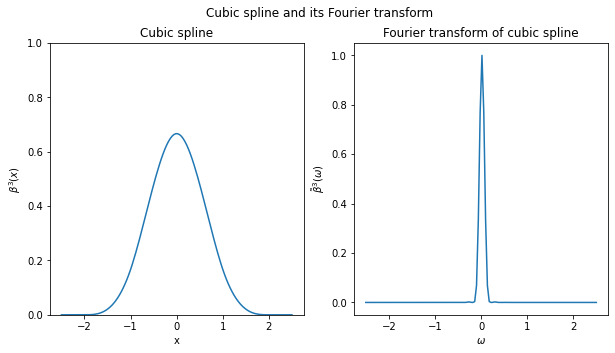

Fig.3 Cubic spline


In [0]:
import numpy as np
import matplotlib.pyplot as plt

N = 128

def mu(x):
  y = np.ones(len(x))
  # Select indices of x where x[i] < 0.
  si = np.where(x < 0)[0]
  y[si] = 0
  return y

lo = -2.5
hi = 2.5
n_samples = N

x = np.linspace(lo, hi, n_samples)
# We will call the five terms of \beta^3(x) b_0, b_1, b_2, b_3.
b_0 = np.multiply(pow(x + 2, 3), mu(x + 2))/6
b_1 = -2/3 * np.multiply(pow(x + 1, 3), mu(x + 1))
b_2 = np.multiply(pow(x, 3), mu(x))
b_3 = -2/3 * np.multiply(pow(x - 1, 3), mu(x - 1))
b_4 = np.multiply(pow(x - 2, 3), mu(x - 2))/6

beta_3 = b_0 + b_1 + b_2 + b_3 + b_4
bf = np.abs(np.fft.fft(beta_3))
# Normalize it.
bf1 = np.fft.fftshift(bf)/np.max(bf)

fig = plt.figure(figsize = (10, 5))
fig.suptitle('Cubic spline and its Fourier transform')
p1 = plt.subplot(121)
p1.set_title('Cubic spline')
p1.set_ylim([0, 1])
plt.plot(x, beta_3, label = r'$\beta^3(x)$')
plt.xlabel('x')
plt.ylabel(r'$\beta^3(x)$')

p2 = plt.subplot(122)
p2.set_title('Fourier transform of cubic spline')
plt.plot(x, bf1, label = r'$\tilde{\beta}^3$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\tilde{\beta}^3(\omega)$')
plt.show()
print('Fig.3 Cubic spline')

# B-spline processing

In this section we consider operations on signal expressed in terms of splines.


# Differentiation
Consider a function $g^n$ expressed in terms of B-splines of order $n$. Thus,
$$\tag{1}
g^n(x) = \sum_{k=-\infty}^\infty y[k]\beta^n(x - k).
$$
Differentiation the above equation with respect to $x$ and using  equation (6) in the section Continuous Polynomial Splines and B-Spline - II we get
$$\tag{2}
\frac{dg^n}{dx} = \sum_{k=-\infty}^\infty y[k]\left(\beta^{n-1}\left(x - k + \frac{1}{2}\right) - \beta^{n-1}\left(x - k - \frac{1}{2}\right)\right).
$$
We can write the right hand side as a sum of two summations. In the second summation we transform the variable $k \mapsto k - 1$ so that
$$\tag{3}
\frac{dg^n}{dx} = \sum_{k=-\infty}^\infty(y[k] - y[k-1])\beta^{n-1}\left(x - k + \frac{1}{2}\right).
$$
The expression $y[k] - y[k-1]$ is just the first difference of the sequence and it can be written as $(d^{(1)} \star y)[k]$, where $d^{(1)}$ is the 'first-difference operator'. Thus,
$$\tag{4}
\frac{dg^n}{dx} = \sum_{k=-\infty}^\infty (d^{(1)} \star y)[k]\beta^{n-1}\left(x - k + \frac{1}{2}\right).
$$
In order to get an expression for the second derivative, we differentiate equation (2). We once again use equation (6) from the section Continuous Polynomial Splines and B-Spline - II to get
$$\tag{5}
\frac{d^2g^n}{dx^2} = \sum_{k=-\infty}^\infty y[k]\left(\beta^{n-2}(x - k + 1) - 2\beta^{n-2}(x-k) + \beta^{n-2}(x - k - 1)\right).
$$
By a change of variable in the first and the third sums, we get
$$\tag{6}
\frac{d^2g^n}{dx^2} = \sum_{k=-\infty}^\infty (y[k+1]-2y[k]+y[k-1])\beta^{n-2}(x-k).
$$
In terms of the second difference operator $d^{(2)}$ we can write this expression as
$$\tag{7}
\frac{d^2g^n}{dx^2} = \sum_{k=-\infty}^\infty (d^{(2)} \star y)[k]\beta^{n-2}(x-k).
$$


## B-spline filtering

Consider a filter whose impulse response is expressed in terms of B-splines of order $p$ as
$$\tag{1}
h^p(x) = \sum_{j=-\infty}^\infty z[j]\beta^p(x - j),
$$
where $z[j]$ are the 'components' of $h^p$ when expressed in terms of the basis $\{\beta^p(x-j): j \in \mathbb{Z}\}$. The operation of $h^p$ on a signal $g^n$ can be expressed as a convolution
$$\tag{2}
(h^p\star g^n)(x) = \int_{-\infty}^\infty h^p(s)g^n(x - s)ds.
$$
If $g^n$ is written as
$$\tag{3}
g^n(x) = \sum_{k=-\infty}^\infty y[k]\beta^n(x - k)
$$ then substituting equations (1) and (3) in equation (2) we get
$$\tag{4}
(h^p\star g^n)(x) = \sum_{j=-\infty}^\infty\sum_{k=-\infty}^\infty z[j]y[k]\int_{-\infty}^\infty \beta^p(s - j)\beta^n(x - s - k)ds.
$$
Introduce a variable $t = s - j$ in the integral to get
$$\tag{5}
(h^p\star g^n)(x) = \sum_{j=-\infty}^\infty\sum_{k=-\infty}^\infty z[j]y[k]\int_{-\infty}^\infty \beta^p(t)\beta^n(x - t - j - k)dt.
$$
Introduce a variable $l = k - j$ in the second sum so that
$$\tag{5}
(h^p\star g^n)(x) = \sum_{j=-\infty}^\infty\sum_{l=-\infty}^\infty z[j]y[l+j]\int_{-\infty}^\infty \beta^p(t)\beta^n(x - t - l)dt.
$$
Finally, introduce the variable $m = -j$ in the first sum to get
$$\tag{5}
(h^p\star g^n)(x) = \sum_{m=-\infty}^\infty\sum_{l=-\infty}^\infty z[m]y[l-m]\int_{-\infty}^\infty \beta^p(t)\beta^n(x - t - l)dt.
$$
Note that summing over $m$ is the same as summing over $-m$. We can now write the sum over $m$ as a convolution to get
$$\tag{6}
(h^p\star g^n)(x) = \sum_{l=-\infty}^\infty (z \star y)[l]\int_{-\infty}^\infty \beta^p(t)\beta^n(x - t - l)dt.
$$



## Smoothing splines

Most signals in real life are noisy. Trying to approximate the raw, noisy signal with splines is not an appropriate choice. A noisy function has a lot of small, fast-varying irregularities. Such irregularities are characterized by non-zero values of higher order derivatives. If the function $g$ is a spline representation of the noisy signal then we define a smoothing spline $\hat{g}$ 
of order $2r-1$ to be the one that minimizes the quantity
$$\tag{1}
\epsilon_S^2 = \sum_{k=-\infty}^\infty (g(k) - \hat{g}(k))^2 + \lambda\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2dx = \epsilon_A^2 + \lambda\epsilon_r^2.
$$
Before proceeding to solve this minimization problem we will understand its structure. A good smoothing function will have two characteristics.

- It will be as close as possible to the original, 'noisy' spline.
- It will not be too irregular. We will prevent it from having large values of higher order derivatives. 

The first characteristic is represented by the term
$$\tag{2}
\epsilon_A^2 = \sum_{k=-\infty}^\infty (g(k) - \hat{g}(k))^2.
$$
Minimizing it ensures that $\hat{g}$ is as close to $g$ as possible. The second characteristic is represented by the second term in equation (1).
$$\tag{3}
\epsilon_r^2 = \int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2dx
$$
Trying to minimize this quantity is equivalent to favouring functions that *do not* have large values for their $r$th order derivatives. The choice value of $\lambda$ indicates the extent to which we are willing to tolerate noise. A large value of $\lambda$ indicates a lower tolerance.

Recall that $\hat{g}$ is the spline representation of the original, noisy
signal $y[k]$. Therefore,
$$\tag{4}
\hat{g}[k] = (b_1^{2r-1} \star y)[k].
$$
Its $r$th order derivative is a generalization of equation (7) of the section 'Differentiation'. That is,
$$\tag{5}
\frac{d^r\hat{g}}{dx^r} = \sum_{j=-\infty}^\infty (d^{(r)} \star y)[j]\beta^{r-1}(x - j).
$$
The square of this quantity is
$$\tag{6}
\left(\frac{d^r\hat{g}}{dx^r}\right)^2 = \sum_{j=-\infty}^\infty \sum_{k=-\infty}^\infty (d^{(r)} \star y)[j]\beta^{r-1}(x - j)(d^{(r)} \star y)[k]\beta^{r-1}(x - k).
$$
Its integral over the entire real line is
$$\tag{7}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
\sum_{j=-\infty}^\infty \sum_{k=-\infty}^\infty (d^{(r)} \star y)[j](d^{(r)} \star y)[k]
\int_{-\infty}^\infty \beta^{r-1}(x - j)\beta^{r-1}(x - k)dx.
$$
Using the transformation $k \mapsto j - k$,
$$\tag{8}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
\sum_{j=-\infty}^\infty \sum_{k=-\infty}^\infty (d^{(r)} \star y)[j](d^{(r)} \star y)[j-k]
\int_{-\infty}^\infty \beta^{r-1}(x - j)\beta^{r-1}(x - j + k)dx.
$$
The integral is just the convolution of $\beta^{r-1}$ with itself. From equation (7) from the section 'Continuous Polynomial Splines and B-Spline - II', it evaluates to $\beta^{2r-1}$. Therefore,
$$\tag{9}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
\sum_{j=-\infty}^\infty \sum_{k=-\infty}^\infty (d^{(r)} \star y)[j](d^{(r)} \star y)[j-k]\beta^{2r-1}(-k).
$$
Since $\beta^{2r-1}(-k) = b_1^{2r-1}[-k]$ we can write the above equation as
$$\tag{10}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
\sum_{j=-\infty}^\infty (d^{(r)} \star y)[j]\sum_{k=-\infty}^\infty(d^{(r)} \star y)[j-k]b_1^{2r-1}[-k].
$$
The sum over $k$ is a convolution. Therefore,
$$\tag{11}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
\sum_{j=-\infty}^\infty (d^{(r)} \star y)[j](d^{(r)} \star y \star b_1^{2r-1})[j].
$$
The sum over $j$ is an inner product. Therefore,
$$\tag{12}
\int_{-\infty}^\infty \left(\frac{d^r\hat{g}}{dx^r}\right)^2 dx = 
(d^{(r)} \star y, d^{(r)} \star y \star b_1^{2r-1}).
$$
The sum in equation (2) is also an inner product $(g - \hat{g}, g - \hat{g})$. Therefore, we can write equation (1) as
$$\tag{13}
\epsilon_S^2 = (g - \hat{g}, g - \hat{g}) + \lambda(d^{(r)} \star y, d^{(r)} \star y \star b_1^{2r-1}).
$$
Scheonberg has demonstrated that the function that minimizes $\epsilon_S^2$ is a spline of order $n = 2r-1$ so that
$$\tag{14}
\hat{g} = b_1^{2r-1} \star y
$$ so that equation (13) becomes
$$\tag{15}
\epsilon_S^2 = (g - b_1^{2r-1} \star y, g - b_1^{2r-1} \star y) + \lambda(d^{(r)} \star y, d^{(r)} \star y \star b_1^{2r-1}).
$$
We expand the first term so that
$$\tag{16}
\epsilon_S^2 = (g, g) - 2(g, b^{2r-1} \star y) + (b^{2r-1} \star y, b^{2r-1} \star y) + \lambda(d^{(r)} \star y, d^{(r)} \star y \star b_1^{2r-1}).
$$
We now minimize this expression. In order to do so, we differentiate it with respect to $y[k]$. The first term is independent of $y[k]$. Therefore, its derivative is $0$. Using equation (4) from the section 'Inner product calculus',
we infer that
$$\tag{17}
\frac{d}{dz} (g, b^{2r-1} \star y) = \left(b_1^{2r-1}\right)^\ast \star g[k].
$$
Similarly, using equation (7) from the section 'Inner product calculus', we get
$$\tag{18}
\frac{d}{dz}(b^{2r-1} \star y, b^{2r-1} \star y) = 2\left(\left(b_1^{2r-1}\right)^\ast \star b_1^{2r-1} \star g\right)[k]
$$
and
$$\tag{19}
\frac{d}{dz}(d^{(r)} \star y, d^{(r)} \star y \star b_1^{2r-1}) = \frac{d}{dz}(d^{(r)} \star y, d^{(r)} \star b_1^{2r-1} \star y) = 2\left(\left(d^{(r)}\right)^\ast \star d^{(r)} \star \left(b_1^{2r-1}\right)^\ast \star y\right)[k].
$$
Therefore, $d\epsilon_S^2/dy[k] = 0$ implies
$$\tag{20}
\left(b_1^{2r-1}\right)^\ast \star g[k] = \left(\left(b_1^{2r-1}\right)^\ast \star b_1^{2r-1} \star g\right)[k] + \left(\left(d^{(r)}\right)^\ast \star d^{(r)} \star \left(b_1^{2r-1}\right)^\ast \star y\right)[k].
$$
The $z$-transform of this equation is
$$\tag{21}
B_1^{2r-1}(z^{-1})G(z) = B_1^{2r-1}(z^{-1})B_1^{2r-1}(z)Y(z) + \lambda D^{(r)}(z^{-1})D^{(r)}(z)B_1^{2r-1}(z^{-1})Y(z).
$$
Assuming that $B_1^{2r-1}(z^{-1}) \ne 0$,
$$\tag{22}
G(z) = B_1^{2r-1}(z)Y(z) + \lambda D^{(r)}(z^{-1})D^{(r)}(z)Y(z).
$$
or 
$$\tag{23}
Y(z) = \frac{G(z)}{B_1^{2r-1}(z) + \lambda D^{(r)}(z^{-1})D^{(r)}(z)}.
$$ 
The $z$-transform of the first (backward) difference operator is $D^{(1)}(z) = 1 - z^{-1}$. Therefore, $D^{(1)}(z^{-1}) = 1 - z$ so that $D^{(1)}(z)D^{(1)}(z^{-1}) = (1 - z^{-1})(1 - z) = 2 - z - z^{-1}$. Since differentiating $r$ times is just operating $D^{(1)}$ $r$ times, the $z$ transform $D^{(r)}(z)D^{(r)}(z^{-1})$ is $ (2 - z - z^{-1})^r$, equation (23) becomes
$$\tag{23}
Y(z) = \frac{G(z)}{B_1^{2r-1}(z) + \lambda (2 - z - z^{-1})^r}.
$$ 
Knowing $Y(z)$ and taking its inverse $z$-transforms gives us the coefficients of the smoothing spline $\hat{g}$.




## Least squares

The previous section dealt with approximating a signal with a smoothing spline. In this section, we approximate using a the spline
$$\tag{1}
g_m^n(x) = \sum_{k=-\infty}^\infty y[k]\beta^n\left(\frac{x}{m} - k\right).
$$
Once again, we have to use a minimization procedure to find the coefficients $y[k]$ of the spline expansion. We can write equation (1) as a convolution between an upsampled $y$ signal and $\beta_m^n$ sampled to give $b_m^n[k]$. Thus,
$$\tag{2}
g_m^n[k] = (y_{\uparrow m}\star b_m^n)[k].
$$
We then minimize
$$\tag{3}
\epsilon_m^2 = \sum_{k=-\infty}^\infty (g[k] - (y_{\uparrow m}\star b_m^n)[k])^2 = (g - y_{\uparrow m}\star b_m^n, g - y_{\uparrow m}\star b_m^n).
$$
or
$$\tag{4}
\epsilon_m^2 = (g, g) - 2(g, y_{\uparrow m}\star b_m^n) + (y_{\uparrow m}\star b_m^n, y_{\uparrow m}\star b_m^n).
$$
Differentiating with respect $y[k]$ we get
$$\tag{5}
\frac{d}{dy[k]}\epsilon_m^2 = 0 - 2(b_m^n \star g)_{\downarrow m}[k] + 2\left(\left(b_m^{n^\ast} \star b_m^n\right)_{\downarrow m} \star y\right)[k].
$$
Equating the derivative to zero we get
$$\tag{6}
(b_m^n \star y)_{\downarrow m}[k] = \left(\left(b_m^{n\ast\ast} \star b_m^n\right)_{\downarrow m} \star y\right)[k].
$$
or, since $b_m^{n\ast\ast}[k] = b_m^n[k]$,
$$\tag{7}
y[k] = \left(\left(\left(b_m^n \star b_m^n\right)_{\downarrow m}\right)^{-1}\star b_m^n \star g\right)[k]
$$
assuming that $\left(\left(b_m^{n} \star b_m^n\right)_{\downarrow m}\right)^{-1}$ exists. Now the $z$ transform of $b_m^n$ is, using equation (13) in the section 'Some topics in signal processing',
$$\tag{8}
B_{\downarrow m}^n(z) = \frac{1}{m}\sum_{j=0}^{m-1}B\left(e^{2\pi ik/m} z^{1/m}\right).
$$
Therefore the $z$ transform of the filter $s_m^n = \left(\left(b_m^{n} \star b_m^n\right)_{\downarrow m}\right)^{-1}$ is
$$\tag{9}
S_m^n(z) = \left(\frac{1}{m}\sum_{j=0}^{m-1}B\left(e^{2\pi ik/m} z^{1/m}\right)\right)^{-2}.
$$


## Extensions to higher dimensions

So far we have dealt with one-dimensional signals. Images, however, are two-dimensional. All except one of the results discussed so far can be easily extended to two dimensions in the same way that the $z$-transform of a one-dimensional signal is extended to that of an image. Essentially, we carry out the one-dimensional operation on each dimension separately. The only operation not amenable to this treatment is the smoothing operation because of the cross-terms arising in the expression for the error term.

The paper mentions extension using tensor products of spline spaces. We will avoid introducing tensor products unless we have to. One can implement most spline algorithms without going through the formal machinery of tensor products.


# Conclusion

Several operations on images are best done on their representations as continuous functions. B-splines are a way to transform discrete images to smooth image-functions. This paper showed how to carry out the transformation. It also demonstrated how to implement commonly used image-processing algorithms on image-functions.

# Appendix

## Inner product calculus
Let $y[k], z[k], h[k]$ be signals in $l^2$. That is, the corresponding sequences $y_k, z_k, h_k$ are members of the Hilbert space $l^2$. Let us compute derivatives of inner products of these sequences. 
$$\tag{1}
\frac{\partial}{\partial y[k]}(y, z) = \frac{\partial}{\partial y[k]}\sum_{l=-\infty}^\infty y[l]z[l] = \sum_{l=-\infty}^\infty z[l]\delta_{kl} = z[k].
$$

The convolution of $h$ and $y$ is 
$$
(h \star y)[n] = \sum_{l=-\infty}^\infty h[l]y[n-l].
$$
so that the inner product $(h \star y, y)$ is
$$
(h \star y, y) = \sum_{n=-\infty}^\infty\sum_{l=-\infty}^\infty h[l]y[n-l]y[n]
$$
and hence 
$$
\begin{eqnarray*}
\frac{\partial}{\partial y[k]}(h \star y, y) &=& \sum_{n=-\infty}^\infty\sum_{l=-\infty}^\infty h[l]y[n]\delta_{k, n-l} + \sum_{n=-\infty}^\infty\sum_{l=-\infty}^\infty h[l]y[n-l]\delta_{kn} \\
& & \sum_{l=-\infty}^\infty h[l]y[l+k] + \sum_{l=-\infty}^\infty h[l]y[k-l] \\
& & \sum_{l=-\infty}^\infty h[-l]y[-l+k] + \sum_{l=-\infty}^\infty h[l]y[k-l] \\
& & \sum_{l=-\infty}^\infty h^\ast[l]y[-l+k] + \sum_{l=-\infty}^\infty h[l]y[k-l] 
\end{eqnarray*}
$$
or
$$\tag{2}
\frac{\partial}{\partial y[k]}(h \star y, y) = (h^\ast \star y)[k] + (h \star y)[k]
$$

We now let $h = \delta$ in the above result and use the facts $\delta \star y = y$ and $\delta^\ast = \delta$ to get
$$\tag{3}
\frac{\partial}{\partial y[k]}(y, y) = 2y[k].
$$
We can readily adapt the proof for the derivative of $(h \star y, y)$ to finding the derivative of $(h \star y, z)$. The second term on the right hand side of the equations evaluating the derivative is zero. Therefore,
$$\tag{4}
\frac{\partial}{\partial y[k]}(h \star y, z) = (h^\ast \star y)[k].
$$
In order to find the derivative of $(h \star y, h \star y)$ with respect to $y[k]$ we first prove that the inner product is identical to $(h^\ast \star h \star y, y)$. This is a manifestation of a well-known property of adjoints 
$$\tag{5}
(z, h \star y) = (h^\ast \star z, y).
$$
We will now prove it.
$$
\begin{eqnarray*}
(z, h \star y) &=& \sum_{i=-\infty}^\infty z[i](h \star y)[i] \\
 &=& \sum_{i=-\infty}^\infty z[i]\sum_{j=-\infty}^\infty h[j]y[i-j] \\
 &=& \sum_{i,j=-\infty}^\infty z[i+j]h[j]y[i] \\
 &=& \sum_{i,j=-\infty}^\infty h[-j]z[i-j]y[i] \\
 &=& \sum_{i,j=-\infty}^\infty h^\ast[j]z[i-j]y[i] \\
 &=& (h^\ast \star z, y)
\end{eqnarray*}
$$
If $z = h \star y$ in the equation (5) we get
$$\tag{6}
(h \star y, h \star y) = (h^\ast \star h \star y, y).
$$
Using equations (2) and (6),
$$\tag{7}
\frac{\partial}{\partial y[k]}(h \star y, h \star y) = (h^\ast \star h)^\ast \star y + h^\ast \star h \star y = (2h^\ast \star h \star y)[k],
$$
where we have used the fact that $(h^\ast \star h)^\ast = h^\ast \star h^{\ast\ast} = h^\ast \star h$.

Now consider the expression $(h \star y_{\uparrow m}, z)$. We can write it as $(y_{\uparrow m}, h^\ast \star z) = (h^\ast \star z, y_{\uparrow m})$. Therefore,
$$\tag{8}
(h \star y_{\uparrow m}, z) = \sum_{i=-\infty}^\infty (h \star z)[i]y_{\uparrow m}[i]
$$
Now, the signal $y_{\uparrow m}$ has $m-1$ zeros between every two values of the original signal $y$. Therefore, the sum of products on the right hand side of the above equation is
$$\tag{9}
(h \star y_{\uparrow m}, z) =  \sum_{i=-\infty}^\infty (h \star z)_{\downarrow m}[i]y[i] =
((h \star z)_{\downarrow m}, y)
$$
Using equation (1),
$$\tag{10}
\frac{\partial}{\partial y[k]}(h \star y_{\uparrow m}, z) = (h \star z)_{\downarrow m}[k]
$$

The expression $(h \star y_{\uparrow m}, h \star y_{\uparrow m})$ can be written as $(h^\ast \star h \star y_{\uparrow m}, y_{\uparrow m})$ using equation (5). Using the manipulations used to obtain equations (8) and (9) we can transform the previous expression to $((h^\ast \star h \star y_{\uparrow m})_{\downarrow m}, y) = ((h^\ast \star h)_{\downarrow m} \star y, y)$. Thus,
$$
\frac{\partial}{\partial y[k]}(h \star y_{\uparrow m}, h \star y_{\uparrow m}) = \frac{\partial}{\partial y[k]}((h^\ast \star h)_{\downarrow m} \star y, y).
$$
Using equation (2), the right hand side simplifies to
$$\tag{11}
\frac{\partial}{\partial y[k]}(h \star y_{\uparrow m}, h \star y_{\uparrow m}) = 2((h^\ast \star h)_{\downarrow m} \star y)[k].
$$



## Discrete B-spline convolution properties

We want to find the $z$ transform of the signal
$$\tag{1}
u_m^n[k]= \sum_{j=0}^{n+1}\frac{(-1)^j}{n!}\binom{n+1}{j}\left(\frac{k}{m} - j\right)^n\mu\left[\frac{k}{m} - j\right] = \beta^n\left(\frac{k}{m} - \frac{n+1}{2}\right).
$$
We first simplify the expression to
$$\tag{2}
u_m^n[k] = \frac{1}{m^n}\sum_{j=0}^{n+1}\frac{(-1)^j}{n!}\binom{n+1}{j}\left(k - mj\right)^n\mu[k - mj].
$$
Define the polynomial
$$\tag{3}
P^n(z) = \sum_{k=0}^\infty k^nz^{-k} = \sum_{k=-\infty}^\infty k^nz^{-k}\mu[k].
$$
$P^n(z)$ is the $z$-transform of the signal $k^n\mu[k]$. We can readily infer that $P^n$ satisfies the recurrence relation
$$\tag{4}
P^n(z) = -z\frac{\partial P^{n-1}}{\partial z}.
$$
For $n=0$, $P^0(z)$ is the $z$-transform of the step function. That is,
$$\tag{5}
P^0(z) = \frac{1}{1 - z^{-1}}.
$$
Using the initial condition of equation (5) in the recurrence relation of equation (4) we can infer the $z$ transform of the signal $k^n\mu[k]$ for any $n > 0$. It can be shown by induction on $n$ that 
$$\tag{6}
P^n(z) = \frac{A^n(z)}{(1 - z^{-1})^{n+1}},
$$
where $A_n$ is a polynomial in $z^{-1}$. The signal $u_m^n[k]$ involves powers of $k - mk$ and not $k$. Therefore in order to use the equation (3) to write its $z$-transform we must use the shift property that if $X(z)$ is the $z$-transform of $x[n]$ then the z-transform of $x[n - m]$ is $z^{-m}X(z)$. Thus, the $z$-transform of $u_m^n[k]$ is
$$\tag{7}
U_m^n(z) = \frac{1}{m^n}\sum_{j=0}^{n+1}\frac{(-z^m)^j}{n!}\binom{n+1}{j}P^n(z).
$$
Using the binomial theorem, 
$$
\sum_{j=0}^{n+1}\binom{n+1}{j}(-z^m)^j = (1 - z^{-m})^{n+1}
$$
in equation (7) we get
$$\tag{8}
U_m^n(z) = \frac{1}{m^n}(1 - z^{-m})^{n+1}\frac{P^n(z)}{n!}.
$$
Substituting equation (6) for $P^n$ we get
$$\tag{9}
U_m^n(z) = \frac{1}{m^n}\frac{A^n(z)}{n!}\left(\frac{1 - z^{-m}}{1 - z^{-1}}\right)^{n+1}.
$$
The right hand side can be written in terms of lower order $U_m^n$ as
$$\tag{10}
U_m^n(z) = \frac{1}{m^n}U_1^n(z)\left(U_m^0(z)\right)^{n+1}.
$$
This form of $U_m^n$ allows us to conclude that 
$$\tag{11}
u_m^n[k] = \frac{1}{m^n}u_1^n \star \underbrace{(u_m^0 \star \cdots \star u_m^0)}_{n+1 \text{ times}}.
$$

We next find the $z$-transform of the signal
$$\tag{12}
v_m^n[k] = \sum_{j=0}^{n+1}\frac{(-1)^j}{n!}\binom{n+1}{j}\left(\frac{k+1/2}{m} - j\right)^n\mu\left[\frac{k+1/2}{m} - j\right] = \beta^n\left(\frac{k+1/2}{m} - \frac{n+1}{2}\right).
$$
Note that we have $k + \frac{1}{2}$ in the argument and not $(k+1)/2$. Thus, we need an expression for the $z$-transform of the signal $a[k] = (k + 1/2)^n$. Let
$$\tag{13}
P_\delta^n(z) = \sum_{k=0}^\infty (k - \delta)^nz^{-k} = \sum_{k=-\infty}^\infty (k - \delta)^nz^{-k}\mu[k - \delta].
$$
Analogous to equation (4) we have the recurrence relation
$$\tag{14}
P_\delta^{n+1}(z) = -z^{-\delta + 1}\frac{\partial}{\partial z}(z^\delta P_\delta^n(z)).
$$
Now 
$$\tag{15}
P_\delta^0(z) = \sum_{k=-\infty}^\infty z^{-k}\mu[k - \delta].
$$
is the $z$-transform of the shifted step signal $\mu[k - \delta]$. In our case, $\delta = -1/2$ Thus,
$$\tag{16}
P_{-1/2}^0(z) = \frac{1}{1 -z^{-1}}.
$$
Note that we do not have a factor of $z^{1/2}$. This is because,
$$
\sum_{n=-\infty}^\infty u[n + 1/2]z^{-n} = \sum_{n = 0}^{\infty} z^{-n} = \frac{1}{1 - z^{-1}}.
$$
The step signal $u[n + 1/2]$ is $1$ for all integers $n$ such that $n + 1/2 \ge 0$. But this is same as the set of all non-negative integers. Following the steps we took to get equation (6), we get
$$\tag{17}
P^n_{-1/2}(z) = \frac{A_n(z^{-1})}{(1 - z^{-1})^{n+1}},
$$
where $A_n$ is a polynomial of degree $n+1$ in $z^{-1}$. Therefore, following steps analogous to get equation (10), we obtain
$$\tag{18}
V_m^n(z) = \frac{1}{m^n}V_1^n(z)\left(V_m^0(z)\right)^{n+1},
$$
where
$$\tag{19}
V_m^0(z) = \frac{1 - z^{-m}}{1 - z^{-1}}
$$
and
$$\tag{20}
V_1^n(z) = \frac{A_n(z)}{n!}.
$$
This form of $U_m^n$ allows us to conclude that 
$$\tag{21}
v_m^n[k] = \frac{1}{m^n}v_1^n \star \underbrace{(v_m^0 \star \cdots \star v_m^0)}_{n+1 \text{ times}}.
$$